## Importing Modules And Dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import GradientBoostingClassifier as gbc
from xgboost import XGBClassifier as xgbc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data=pd.read_csv('train.csv')

In [3]:
data

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
row_11=data.iloc[17293]
row_11

Unnamed: 0                                             17293
id                                                     22041
Gender                                                Female
Customer Type                                 Loyal Customer
Age                                                       10
Type of Travel                               Personal Travel
Class                                               Eco Plus
Flight Distance                                          448
Inflight wifi service                                      2
Departure/Arrival time convenient                          4
Ease of Online booking                                     2
Gate location                                              5
Food and drink                                             3
Online boarding                                            2
Seat comfort                                               5
Inflight entertainment                                     3
On-board service        

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
data.head(3)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  

[3 rows x 25 columns]

In [8]:
data.tail(3)

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
103901      103901  68825    Male  disloyal Customer   30  Business travel   
103902      103902  54173  Female  disloyal Customer   22  Business travel   
103903      103903  62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
103901                 5            4                           7   
103902                 4            1                           0   
103903                 3            1                           0   

        Arrival Delay in Minutes             satisfaction  
103901                      14.0  neutral or dissatisfied  
103902                       0.0  neutral or dissatisfied  
103903                       0.0  neutral or dissatisfied  

[3 rows x 25 columns]

In [9]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [10]:
data.shape

(103904, 25)

In [11]:
# Dropping unnecessary columns and handling missing values
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

## Plotting of Numerical Columns in this Dataset

### Histogram

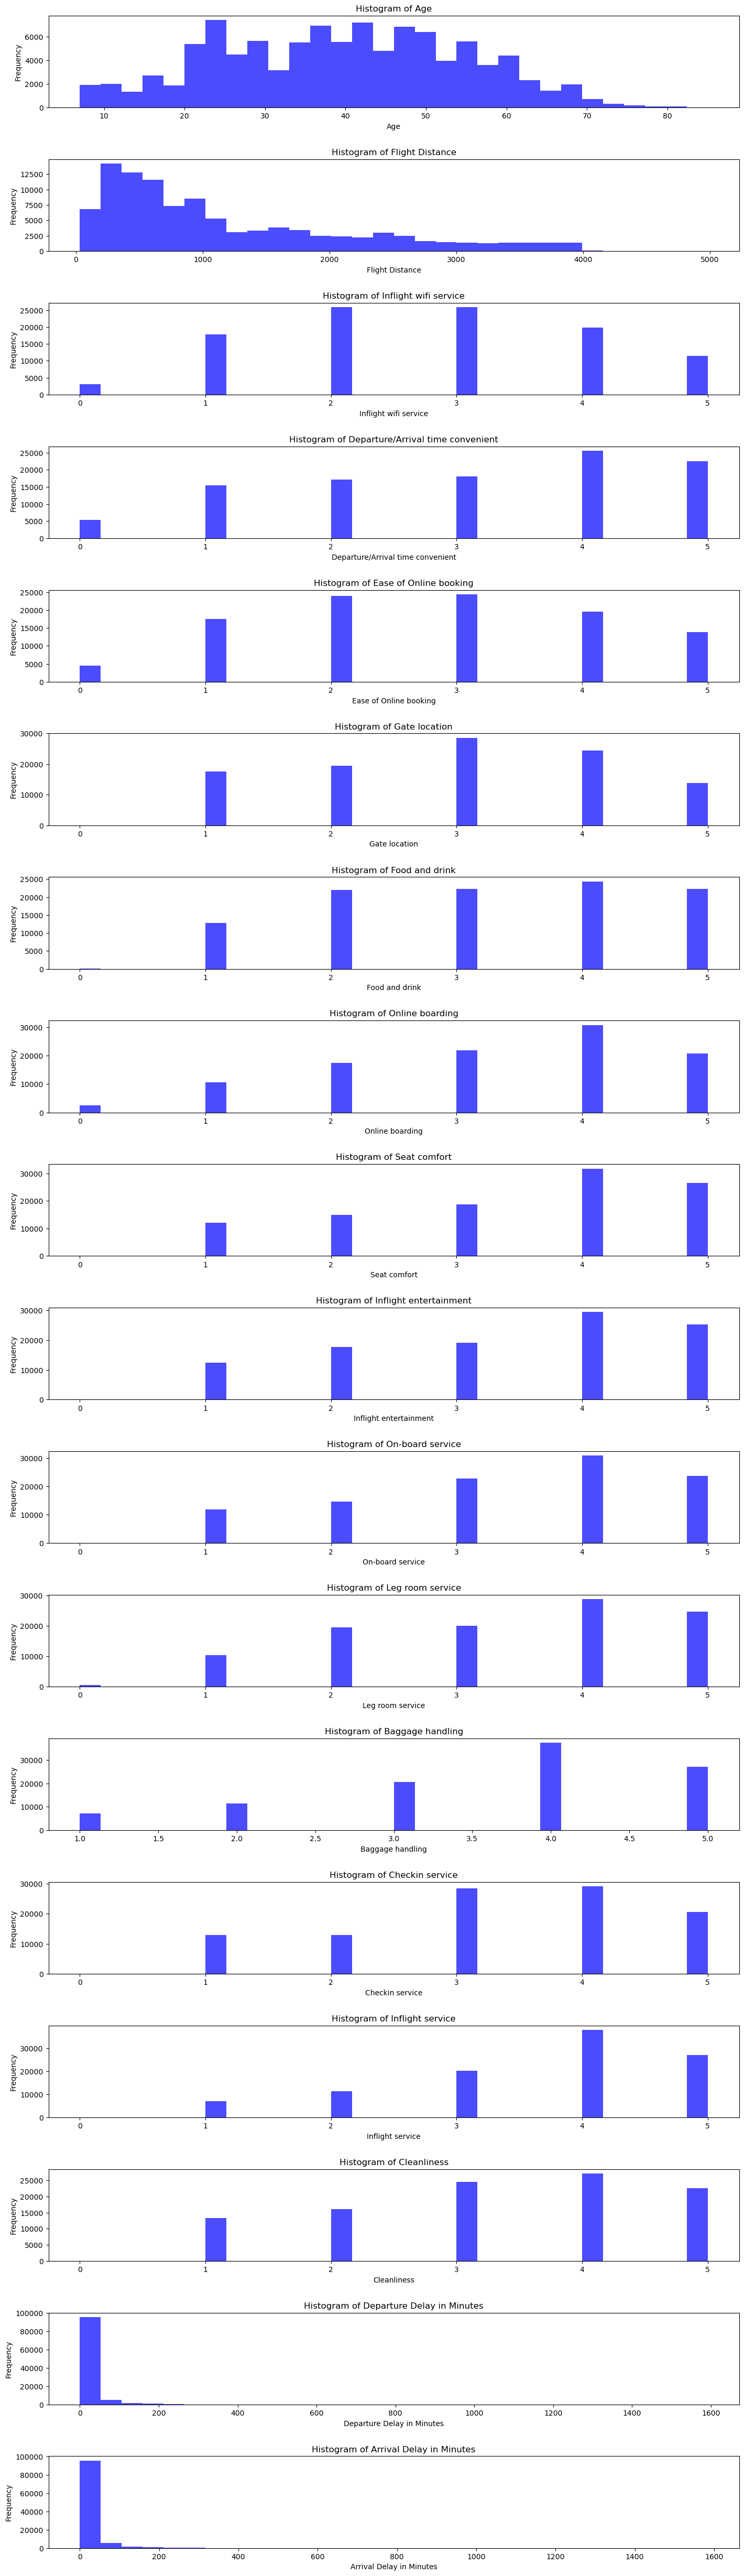

In [12]:
# Selecting only numerical columns for histograms
numerical_columns=data.select_dtypes(include=['number']).columns

# Plot histograms for all numerical columns
fig,axes=plt.subplots(len(numerical_columns),1,figsize=(15,50))
fig.tight_layout(pad=5)

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(data[column].dropna(), bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()

### PairPlot

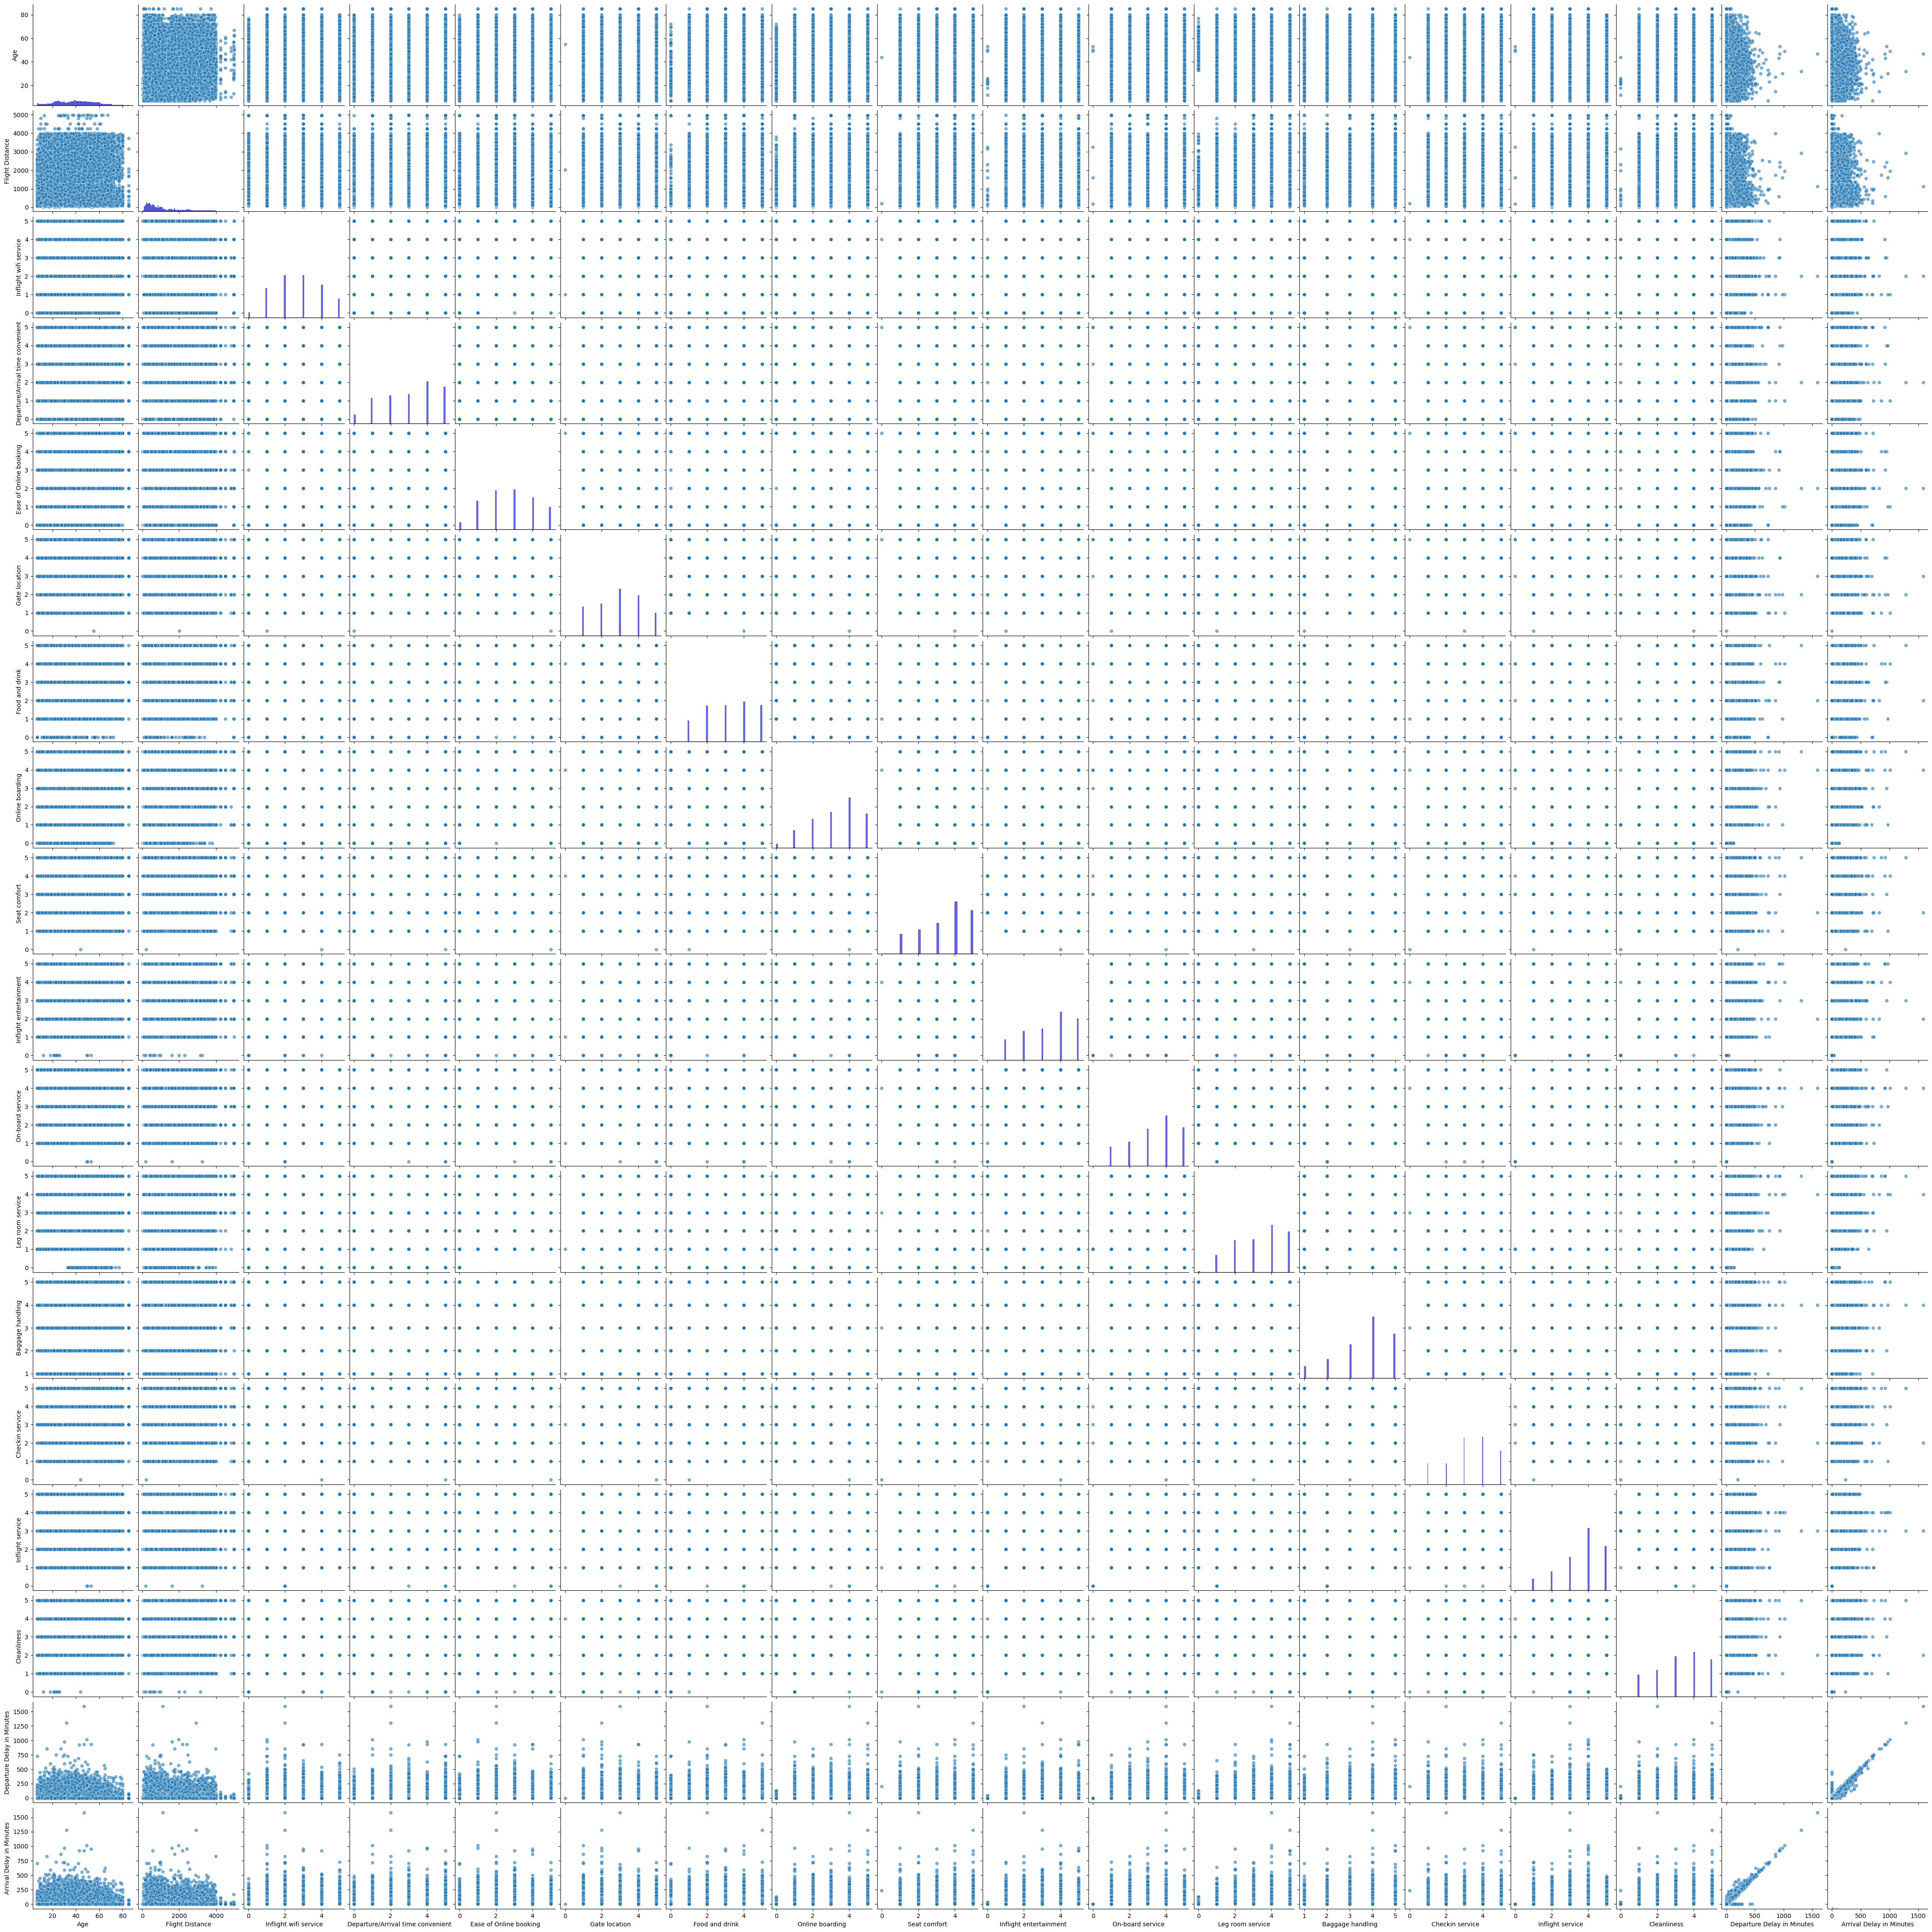

In [13]:
# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values if needed (optional, depending on your use case)
data.dropna(inplace=True)

# Select numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Generate pairplot
sn.pairplot(numerical_columns, diag_kind='hist', plot_kws={'alpha': 0.6}, diag_kws={'color': 'blue', 'alpha': 0.6})
plt.show()

## Feature Engineering

In [14]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
data['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [16]:
data['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [17]:
data['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [18]:
data['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [19]:
# Convert multiple columns using map
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel':0 , 'Business travel': 1})
data['Class'] = data['Class'].map({'Business':0 , 'Eco': 1,'Eco Plus':2})
data['satisfaction'] = data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

### Finding Outliers

In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier boundaries (1.5 * IQR below Q1, 1.5 * IQR above Q3)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows where any value is an outlier
outliers = (data < lower_bound) | (data > upper_bound)

# Find rows with any outliers
outlier_rows = data[outliers.any(axis=1)]
print("Outliers identified:")
print(outlier_rows)

Outliers identified:
        Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
1            1              0   25               1      0              235   
3            0              1   25               1      0              562   
9            1              0   20               1      1             1061   
10           0              0   24               1      1             1182   
14           0              1   26               0      1              453   
...        ...            ...  ...             ...    ...              ...   
103895       0              0   24               1      1             1055   
103896       1              1   57               1      1              867   
103899       0              0   23               1      1              192   
103901       1              0   30               1      0             1995   
103902       0              0   22               1      1             1000   

        Inflight wifi service  Departure/A

In [21]:
outlier_percentage = (len(outliers) / len(data)) * 100
print(f"Outliers make up {outlier_percentage:.2f}% of the dataset.")

Outliers make up 100.00% of the dataset.


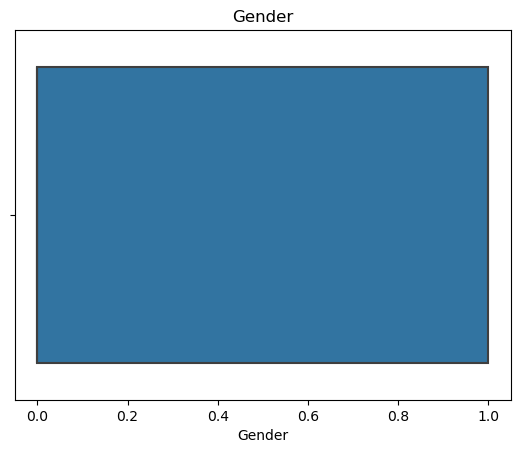

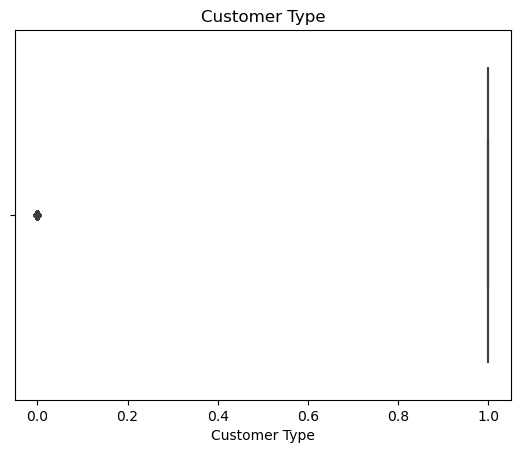

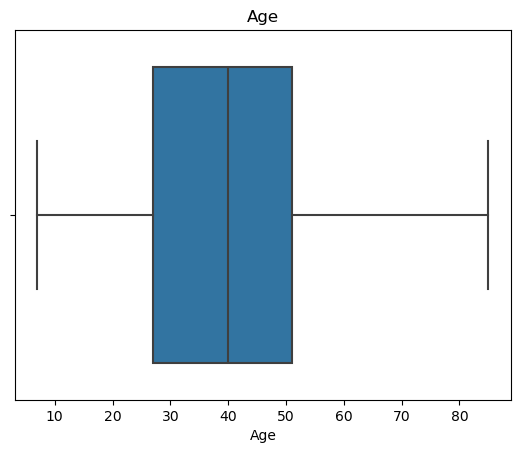

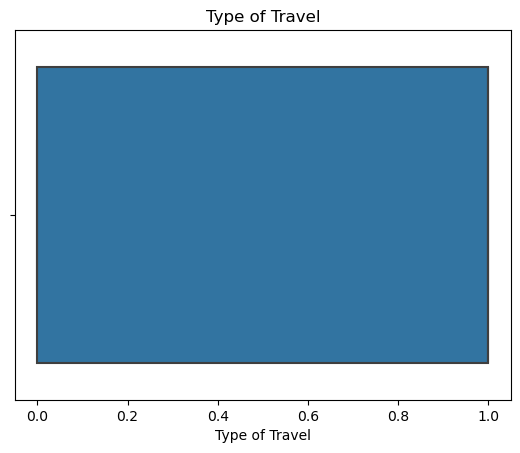

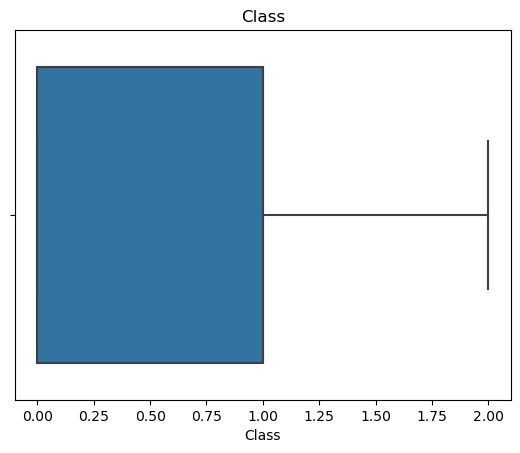

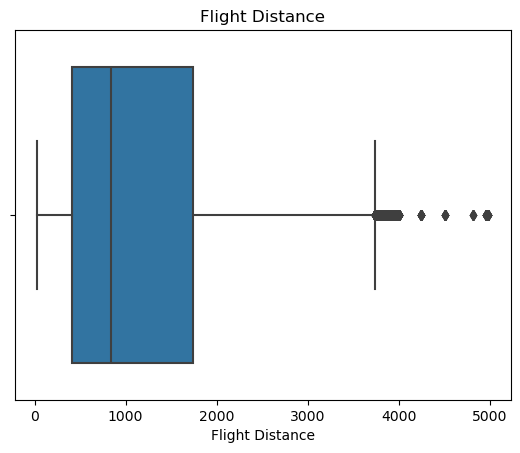

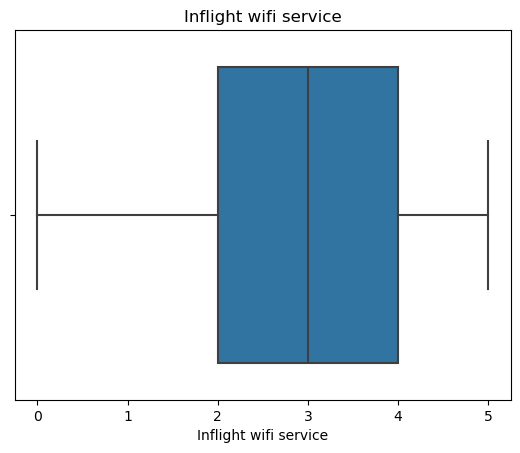

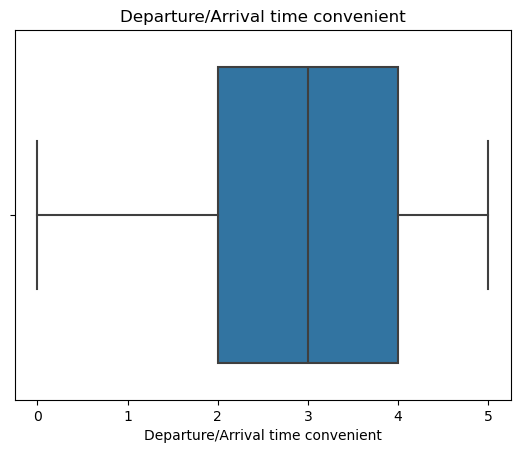

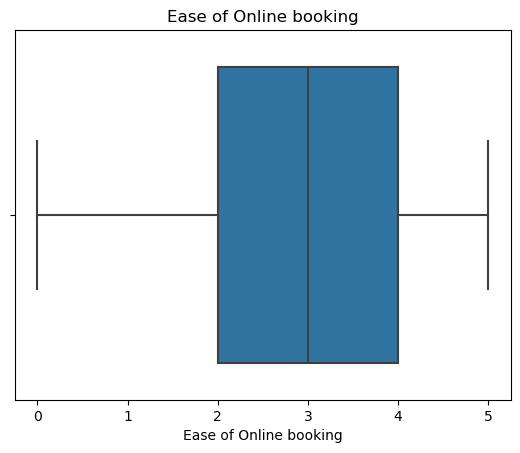

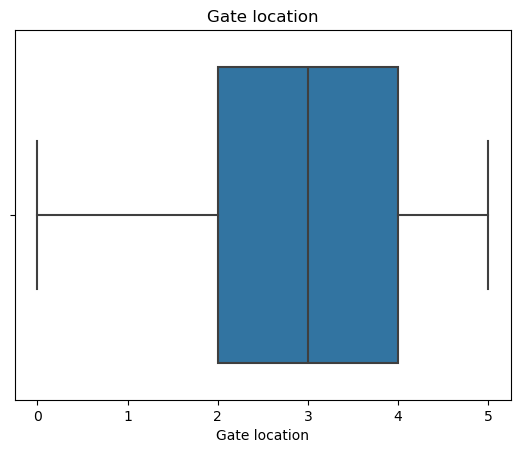

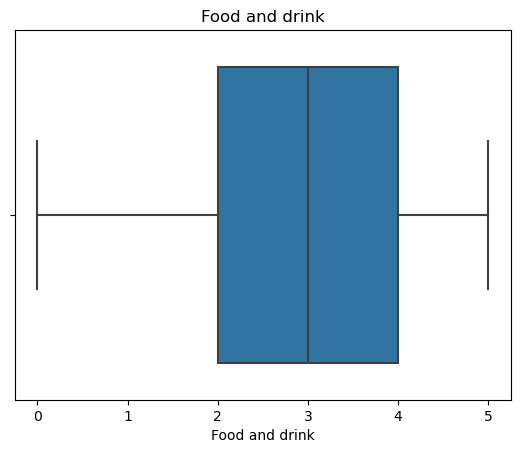

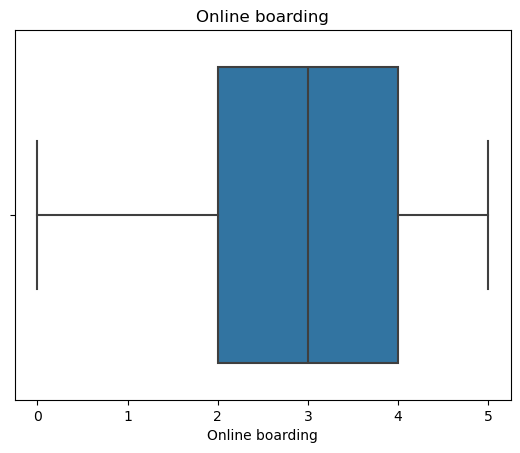

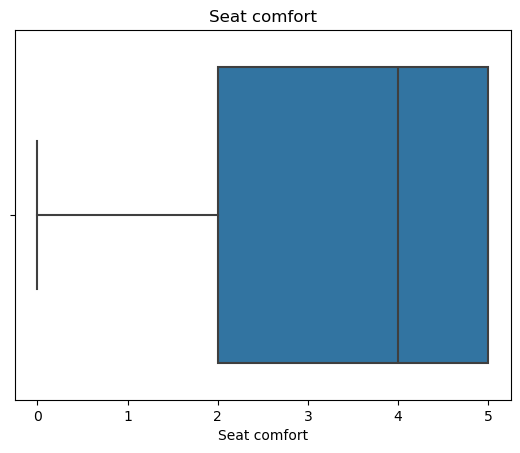

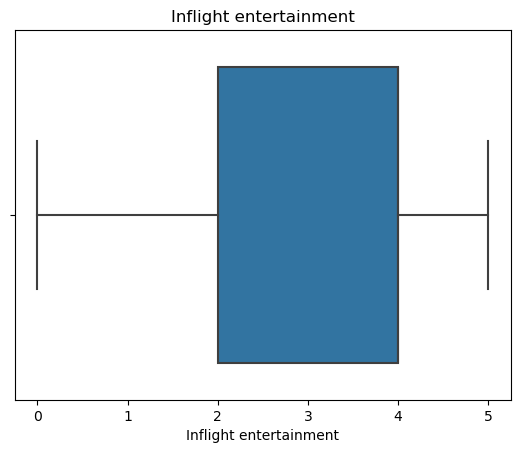

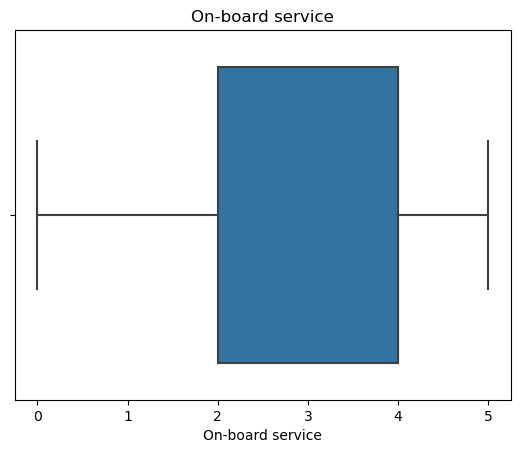

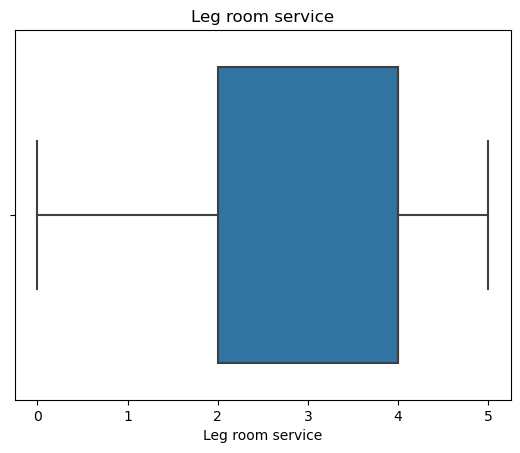

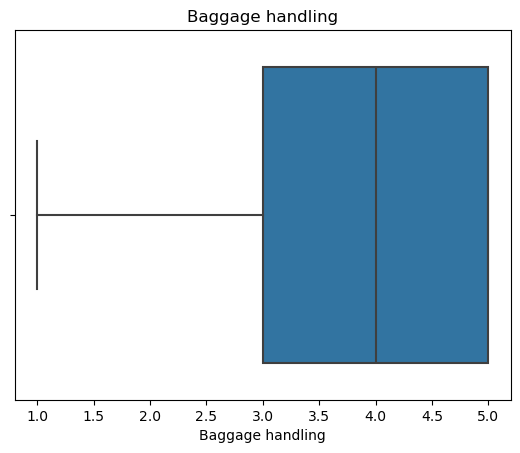

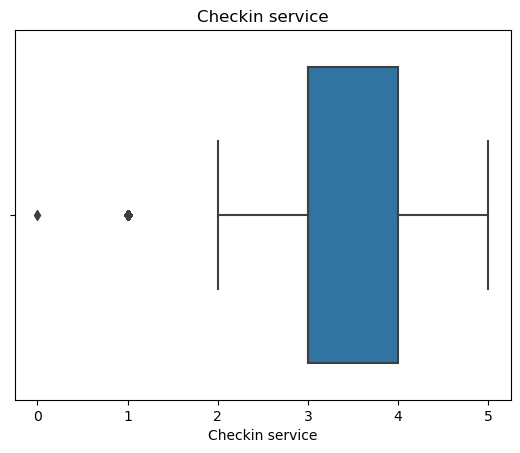

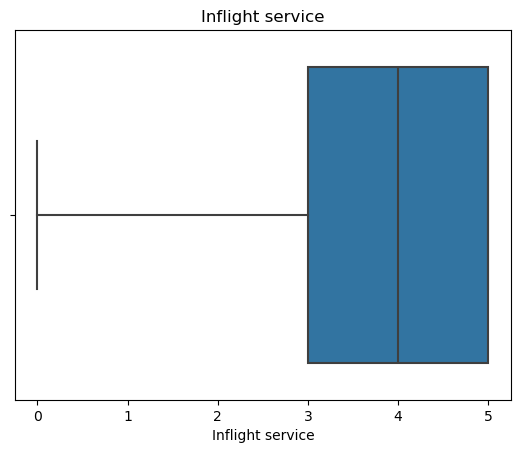

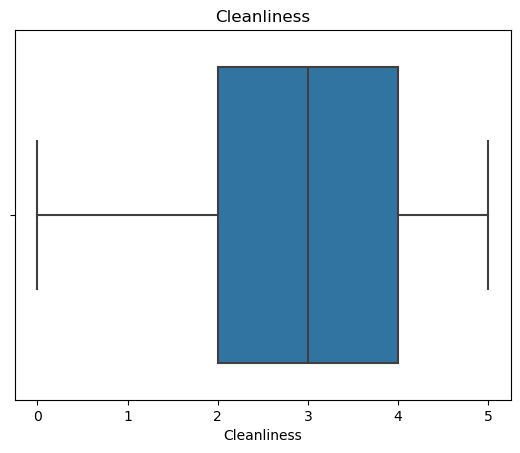

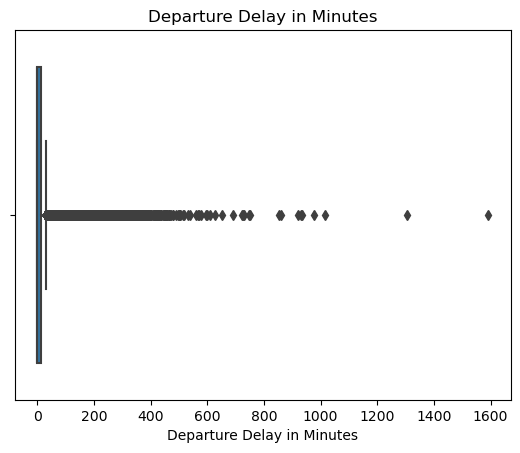

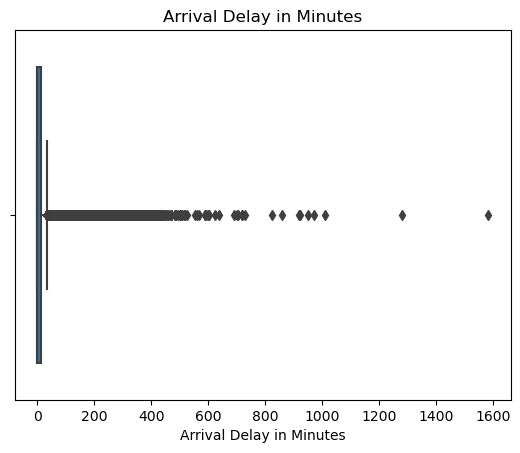

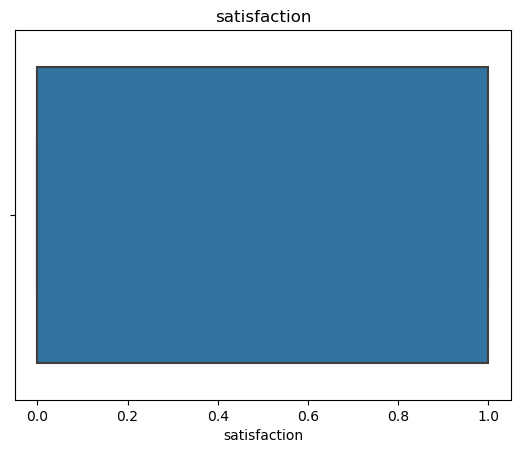

In [22]:
for col in data.select_dtypes(include=['number']).columns:
    sn.boxplot(x=data[col])
    plt.title(col)
    plt.show()

In [23]:
data.describe()

Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.817322      39.379706        0.689627   
std         0.499947       0.386404      15.114964        0.462649   
min         0.000000       0.000000       7.000000        0.000000   
25%         0.000000       1.000000      27.000000        0.000000   
50%         0.000000       1.000000      40.000000        1.000000   
75%         1.000000       1.000000      51.000000        1.000000   
max         1.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean        0.594135      1189.448375               2.729683   
std         0.620799       997.147281               1.327829   
min         0.000000        31.000000               0.000000   
25%         0.000000       414.000000               2.000000   
50%         1.000000       843.000000               3.000000   
75%         1.000000      1743.000000               4.000000   
max         2.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  ...  Inflight entertainment  On-board service  \
count  103904.000000  ...           103904.000000     103904.000000   
mean        2.976883  ...                3.358158          3.382363   
std         1.277621  ...                1.332991          1.288354   
min         0.000000  ...                0.000000          0.000000   
25%         2.000000  ...                2.000000          2.000000   
50%         3.000000  ...                4.000000          4.000000   
75%         4.000000  ...                4.000000          4.000000   
max         5.000000  ...                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  103904.000000               103904.000000             103904.000000   
mean        3.286351                   14.815618                 15.133392   
std         1.312273                   38.230901                 38.649776   
min         0.000000                    0.000000                  0.000000   
25%         2.000000                    0.000000                  0.000000   
50%         3.000000                    0.000000                  0.000000   
75%         4.000000                   12.000000                 13.000000   
max         5.000000                 1592.000000               1584.000000   

        satisfaction  
count  103904.000000  
mean        0.433333  
std         0.495538  
min         0.000000  
25%         0.

## Model Selection And Hyperparameter Tuning

In [24]:
# Splitting data into features (X) and target variable (y)
x=data.drop('satisfaction',axis=1)
y=data['satisfaction']

In [25]:
# Splitting the data into training and testing datasets (80% train, 20% test)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
xtrain_smote,ytrain_smote=smote.fit_resample(xtrain,ytrain)

In [27]:
print("After SMOTE:",ytrain_smote.value_counts())

After SMOTE: satisfaction
1    47103
0    47103
Name: count, dtype: int64


In [28]:
models = [
    ('Random Forest classifier', rfc()),
    ('Logistic Regression', lr()),
    ('SVM', SVC()),
    ('Decision Tree Clasiifier', dtc()),
    ('KNN', knn())
]

# Sample 10,000 rows for faster testing
x_sample = x.sample(n=10000, random_state=42)  # Assuming X is your features
y_sample = y.loc[x_sample.index]  # Assuming y is your target variable

# Use the sample for cross-validation
for name, model in models:
    cv_scores = cross_val_score(model, x_sample, y_sample, cv=5,n_jobs=-1)  # 3-fold CV
    print(f"{name} - Mean CV Accuracy: {cv_scores.mean():.2f}")

Random Forest classifier - Mean CV Accuracy: 0.95
Logistic Regression - Mean CV Accuracy: 0.81
SVM - Mean CV Accuracy: 0.66
Decision Tree Clasiifier - Mean CV Accuracy: 0.92
KNN - Mean CV Accuracy: 0.68


In [29]:
from sklearn.model_selection import GridSearchCV

# Define the DecisionTreeClassifier
model = dtc(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model and evaluate it on the test data
best_model = grid_search.best_estimator_
print(f"Test Accuracy: {best_model.score(xtest,ytest):.4f}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 20}
Test Accuracy: 0.9549


## Model Fitting

In [30]:
model=dtc(criterion='gini',max_depth=15,min_samples_leaf= 2, min_samples_split= 20)

In [31]:
model.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=20)

In [32]:
train_pred=model.predict(xtrain)

In [33]:
accuracy_score(ytrain,train_pred)

0.9636201773275748

In [34]:
test_pred=model.predict(xtest)

In [35]:
accuracy_score(ytest,test_pred)

0.949473076367836

In [36]:
test_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

## Model Evaluation

In [37]:
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     11776
           1       0.94      0.94      0.94      9005

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [38]:
cm=confusion_matrix(ytest,test_pred)
cm

array([[11235,   541],
       [  509,  8496]], dtype=int64)

Text(70.72222222222221, 0.5, 'actual')

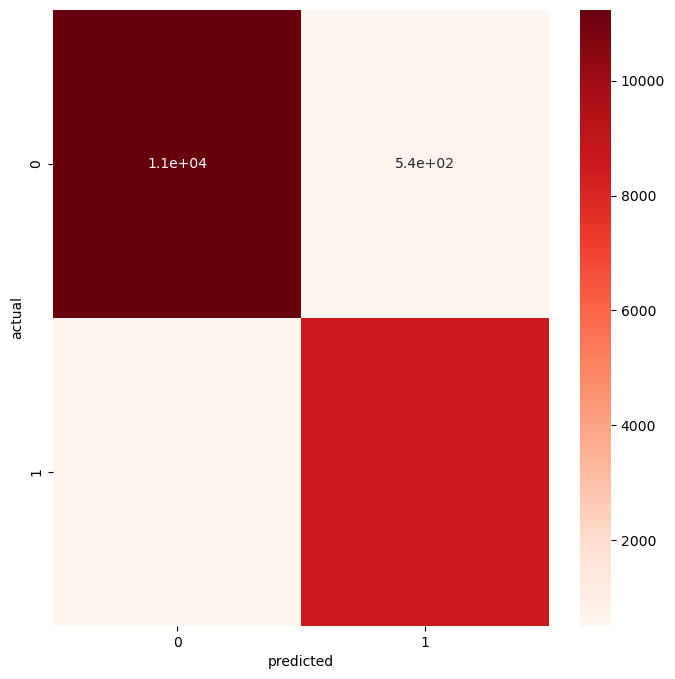

In [39]:
plt.figure(figsize=(8,8))
sn.heatmap(cm,annot=True,cmap='Reds')
plt.xlabel('predicted')
plt.ylabel('actual')

## Saving The Model

In [40]:
import joblib
joblib.dump(model,'decision_tree_model.pkl')

['decision_tree_model.pkl']

## Loading the Model

In [41]:
loaded=joblib.load('decision_tree_model.pkl')

## Predicting The Model

In [44]:
prediction=loaded.predict(xtest)

In [45]:
prediction

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

## RunModel

In [48]:
import pandas as pd

def run_model(model, x):
    """
    This function collects user inputs, preprocesses the data to match the model's requirements,
    and uses a pre-trained Random Forest model to predict airline passenger satisfaction.
    """
    try:
        # Collect user inputs
        print("Please provide the following details:")
        Gender = input('Male or Female (as exactly): ')
        Customer_Type = input('Loyal Customer or Disloyal Customer (as exactly): ')
        Age = int(input('Enter the passenger age: '))
        Type_of_Travel = input('Personal Travel or Business travel (as exactly): ')
        Class = input('Business, Eco, or Eco Plus (as exactly): ')
        Flight_Distance = float(input('Enter the flight distance (in miles): '))
        Inflight_wifi_service = int(input('Rate inflight Wi-Fi service (0-5): '))
        Departure_Arrival_time_convenient = int(input('Rate departure/arrival time convenience (0-5): '))
        Ease_of_Online_booking = int(input('Rate ease of online booking (0-5): '))
        Gate_location = int(input('Rate gate location (0-5): '))
        Food_and_drink = int(input('Rate food and drink quality (0-5): '))
        Online_boarding = int(input('Rate online boarding (0-5): '))
        Seat_comfort = int(input('Rate seat comfort (0-5): '))
        Inflight_entertainment = int(input('Rate inflight entertainment (0-5): '))
        On_board_service = int(input('Rate onboard service (0-5): '))
        Leg_room_service = int(input('Rate leg room service (0-5): '))
        Baggage_handling = int(input('Rate baggage handling (1-5): '))
        Checkin_service = int(input('Rate check-in service (0-5): '))
        Inflight_service = int(input('Rate inflight service (0-5): '))
        Cleanliness = int(input('Rate cleanliness (0-5): '))
        Departure_Delay_in_Minutes = int(input('Enter departure delay in minutes (0 to 1592): '))
        Arrival_Delay_in_Minutes = float(input('Enter arrival delay in minutes in decimals(0 to 1584): '))

        # Create a DataFrame from the inputs
        input_data = pd.DataFrame({
            'Gender': [Gender],
            'Customer_Type': [Customer_Type],
            'Age': [Age],
            'Type_of_Travel': [Type_of_Travel],
            'Class': [Class],
            'Flight Distance': [Flight_Distance],
            'Inflight_wifi_service': [Inflight_wifi_service],
            'Departure/Arrival_time_convenient': [Departure_Arrival_time_convenient],
            'Ease_of_Online_booking': [Ease_of_Online_booking],
            'Gate_location': [Gate_location],
            'Food_and_drink': [Food_and_drink],
            'Online_boarding': [Online_boarding],
            'Seat_comfort': [Seat_comfort],
            'Inflight_entertainment': [Inflight_entertainment],
            'On-board_service': [On_board_service],
            'Leg_room_service': [Leg_room_service],
            'Baggage_handling': [Baggage_handling],
            'Checkin_service': [Checkin_service],
            'Inflight_service': [Inflight_service],
            'Cleanliness': [Cleanliness],
            'Departure_Delay_in_Minutes': [Departure_Delay_in_Minutes],
            'Arrival_Delay_in_Minutes': [Arrival_Delay_in_Minutes]
        })

        # Preprocess the input to match training data
        input_data = pd.get_dummies(input_data, drop_first=True)  # One-hot encode categorical features
        input_data = input_data.reindex(columns=x.columns, fill_value=0)  # Align with training data columns

        # Predict satisfaction using the trained Random Forest model
        result = model.predict(input_data)

        # Display the result
        if result[0] == 1:
            print("\nPrediction: The passenger is predicted to be SATISFIED with the airline service.")
        else:
            print("\nPrediction: The passenger is predicted to be DISSATISFIED with the airline service.")
        
        print("\nThank you for using the Airline Satisfaction Prediction tool!")

    except ValueError:
        print("\nInvalid input. Please enter numeric values where required and try again.")
    except Exception as e:
        print(f"\nAn error occurred: {e}")

run_model(model, x)

Please provide the following details:


Male or Female (as exactly):  Male
Loyal Customer or Disloyal Customer (as exactly):  Loyal Customer
Enter the passenger age:  21
Personal Travel or Business travel (as exactly):  Personal Travel
Business, Eco, or Eco Plus (as exactly):  Eco Plus
Enter the flight distance (in miles):  312
Rate inflight Wi-Fi service (0-5):  4
Rate departure/arrival time convenience (0-5):  3
Rate ease of online booking (0-5):  2
Rate gate location (0-5):  5
Rate food and drink quality (0-5):  3
Rate online boarding (0-5):  4
Rate seat comfort (0-5):  0
Rate inflight entertainment (0-5):  2
Rate onboard service (0-5):  3
Rate leg room service (0-5):  4
Rate baggage handling (1-5):  4
Rate check-in service (0-5):  5
Rate inflight service (0-5):  3
Rate cleanliness (0-5):  4
Enter departure delay in minutes (0 to 1592):  2
Enter arrival delay in minutes in decimals(0 to 1584):  0.0



Prediction: The passenger is predicted to be SATISFIED with the airline service.

Thank you for using the Airline Satisfaction Prediction tool!
